In [103]:
using CSV, DataFrames
using FileIO, Dates
using Graphs, MetaGraphs
using DataStructures
using Plots

include("../region_cube_split/cubes.jl")

region_cube_split (generic function with 1 method)

In [104]:
romania_full = CSV.read("../data/romania.csv", DataFrame);
romania = romania_full[romania_full.Datetime .> DateTime(1980,1,1,0,0,0),:];

vrancea = romania[(romania.Latitude .>= 45.20) .& (romania.Latitude .<= 46.0) .& 
                    (romania.Longitude .>= 26.0) .& (romania.Longitude .<= 27.0) .&
                    (romania.Depth .>= 50.0) .& (romania.Depth .<= 200.0), :];

In [105]:
vrancea = vrancea[vrancea.Magnitude .> 2.0,:];

In [106]:
vrancea, vrancea_cubes = region_cube_split(vrancea,side=5);

In [107]:
G = Graphs.Graph(length(vrancea_cubes.cubeIndex))
MG = MetaGraph(G)

for i in 1:nv(MG)
    set_prop!(MG, i, :cubeIndex, vrancea_cubes.cubeIndex[i])
    set_prop!(MG, i, :degree, 0)
end

set_indexing_prop!(MG, :cubeIndex)

Set{Symbol} with 1 element:
  :cubeIndex

In [108]:
edgeWeight=true

true

In [109]:
length(vrancea.cubeIndex)

7526

In [110]:
i=0
while i < length(vrancea.cubeIndex)-1

    i+=1
    current_node = MG[vrancea.cubeIndex[i],:cubeIndex]
    target_node = MG[vrancea.cubeIndex[i+1],:cubeIndex]

    
    if edgeWeight == false
        add_edge!(MG,current_node,target_node)
    else
        if has_edge(MG, current_node, target_node)
            set_prop!(MG,current_node,target_node,
                    :weight, get_prop(MG,Edge(current_node,target_node),:weight)+1)

            set_prop!(MG, current_node, :degree, get_prop(MG,current_node,:degree)+1)
            set_prop!(MG, target_node, :degree, get_prop(MG,target_node,:degree)+1)

            continue

        else
            add_edge!(MG,current_node,target_node,:weight,1)
            set_prop!(MG, current_node, :degree, get_prop(MG,current_node,:degree)+1)
            set_prop!(MG, target_node, :degree, get_prop(MG,target_node,:degree)+1)
        end
    end

end
MG

{1643, 7334} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [111]:
degrees=[]
for i=1:nv(MG)
    push!(degrees,get_prop(MG,i,:degree))
end

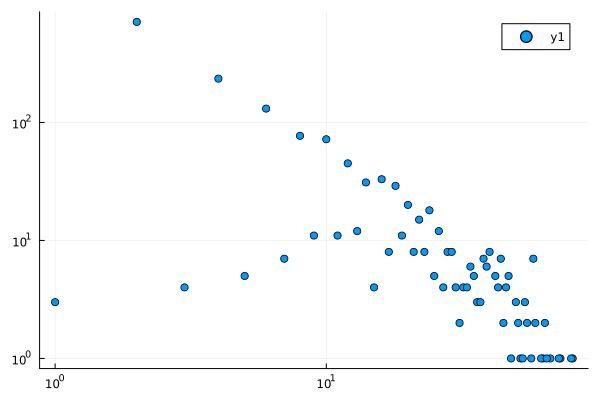

In [112]:
c = counter(connectivity)
Plots.scatter(collect(keys(c)),collect(values(c)),xscale=:log10, yscale=:log10)

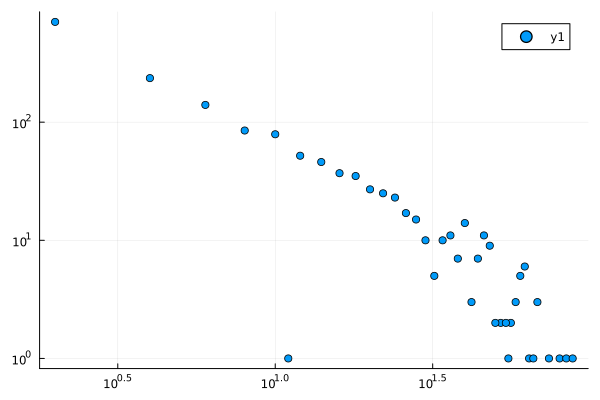

In [113]:
d = counter(degrees)
Plots.scatter(collect(keys(d)),collect(values(d)),xscale=:log10, yscale=:log10)

In [114]:
sort(collect(d), by = x->x[1])

40-element Vector{Pair{Any, Int64}}:
  2 => 706
  4 => 236
  6 => 140
  8 => 85
 10 => 79
 11 => 1
 12 => 52
 14 => 46
 16 => 37
 18 => 35
    ⋮
 60 => 5
 62 => 6
 64 => 1
 66 => 1
 68 => 3
 74 => 1
 80 => 1
 84 => 1
 88 => 1

In [76]:
degrees=[]
k=0
for i=1:nv(MG)
    # push!(degrees,get_prop(MG,i,:degree))
    if get_prop(MG,i,:degree) == 9
        println(i)
        k+=1
    end
end
println(k)

158
1


In [77]:
neighbors(MG, 158)

9-element Vector{Int64}:
  15
 157
 159
 170
 213
 310
 508
 714
 777

In [78]:
get_prop(MG,158,:cubeIndex)

"1670"

In [79]:
vrancea[vrancea.cubeIndex .== get_prop(MG,158,:cubeIndex),:]

Row,Datetime,Latitude,Longitude,Depth,Magnitude,cubeIndex
,DateTime,Float64,Float64,Float64,Float64,String
1,1990-11-27T11:42:24.300,45.83,26.82,78.9,3.3,1670
2,2003-07-23T05:37:53.200,45.83,26.79,76.5,3.2,1670
3,2015-02-01T13:08:51.420,45.8377,26.8137,76.8,2.8,1670
4,2021-12-30T14:57:00.520,45.836,26.7793,75.6,3.8,1670
5,2023-01-29T13:01:50.490,45.8417,26.8085,79.3,2.7,1670


In [80]:
vrancea[vrancea.cubeIndex .== get_prop(MG,157,:cubeIndex),:]

Row,Datetime,Latitude,Longitude,Depth,Magnitude,cubeIndex
,DateTime,Float64,Float64,Float64,Float64,String
1,1990-11-23T23:31:21.500,45.61,26.33,148.9,3.6,5571
2,2007-06-18T02:55:37.500,45.62,26.36,145.4,2.9,5571


In [58]:
for i=1:nv(MG)
    # push!(degrees,get_prop(MG,i,:degree))
    if isodd(get_prop(MG,i,:degree))
        println(i)

    end
end

1
165


In [59]:
neighbors(MG, 1)

1-element Vector{Int64}:
 2

In [60]:
neighbors(MG, 165)

11-element Vector{Int64}:
   19
   27
   64
  142
  182
  303
  349
  760
  849
  905
 1180

In [62]:
get_prop(MG,1,:cubeIndex)

"6433"

In [106]:
get_prop(MG,188,:degree)

35

"5839"

Row,Datetime,Latitude,Longitude,Depth,Magnitude,cubeIndex
,DateTime,Float64,Float64,Float64,Float64,String
1,1976-08-19T19:03:00.800,45.54,26.37,162.0,2.3,6433


In [101]:
vrancea

Row,Datetime,Latitude,Longitude,Depth,Magnitude,cubeIndex
,DateTime,Float64,Float64,Float64,Float64,String
1,1976-09-07T17:38:08.200,45.62,26.5,155.3,3.6,5839
2,1976-10-01T17:50:43.200,45.68,26.49,146.0,6.0,5296
3,1977-03-04T19:21:54.100,45.77,26.76,94.0,7.4,2374
4,1977-03-05T12:08:42,45.37,26.3,124.0,3.5,3878
5,1977-03-12T13:27:13.300,45.74,26.9,99.9,3.8,2680
6,1977-03-12T18:02:15.200,45.79,26.89,100.0,3.5,2953
7,1977-03-22T08:26:52.100,45.51,26.15,167.0,3.5,6279
8,1977-04-04T02:15:49.700,45.59,26.64,115.0,3.8,3696
9,1977-06-16T02:26:10.300,45.74,26.6,151.0,4.7,5587


In [90]:
sort(collect(d), by = x->x[1])

31-element Vector{Pair{Any, Int64}}:
  2 => 408
  4 => 153
  6 => 79
  8 => 54
 10 => 46
 12 => 34
 14 => 23
 16 => 19
 17 => 1
 18 => 15
    ⋮
 42 => 5
 44 => 2
 48 => 2
 52 => 1
 56 => 1
 58 => 1
 60 => 1
 66 => 1
 76 => 1

In [65]:
d[2]

713

In [67]:
props(MG)

Dict{Symbol, Any}()

In [68]:
G = Graph(MG)

{1658, 7465} undirected simple Int64 graph

In [69]:
connectivity = degree(MG)

1658-element Vector{Int64}:
  1
 29
 16
 29
  2
  2
  6
  2
  2
  2
  ⋮
  2
  2
  2
  2
  2
  2
  2
  2
  2

In [70]:
using DataStructures, Plots

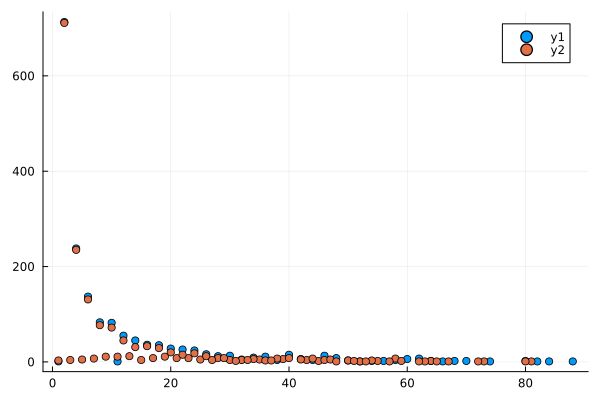

In [71]:
c = counter(connectivity)
Plots.scatter!(collect(keys(c)),collect(values(c)))

In [235]:
for i in 1:nv(MG)
    set_prop!(MG, i, :xLatitude, vrancea_cubes.xLatitude[i])
    set_prop!(MG, i, :yLongitude, vrancea_cubes.yLongitude[i])
    set_prop!(MG, i, :zDepth, vrancea_cubes.zDepth[i])
end

In [237]:
props(MG,2)

Dict{Symbol, Any} with 4 entries:
  :zDepth     => 22
  :cubeIndex  => "6183"
  :xLatitude  => 10
  :yLongitude => 8

In [258]:
using GraphIO, EzXML

In [262]:
savegraph("./vrancea_5km.graphml", MG, GraphMLFormat())

1

In [248]:
savegraph("./vrancea_5km.txt",MG, EdgeListFormat())

1

In [43]:
using Graphs, MetaGraphs

In [44]:
G = Graphs.Graph(5)
MG = MetaGraph(G)

{5, 0} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [45]:
add_edge!(MG,1,2)
add_edge!(MG,2,3)
add_edge!(MG,3,4)
add_edge!(MG,4,5)


true

In [47]:
connectivity = degree(MG)

5-element Vector{Int64}:
 1
 2
 2
 2
 1

In [48]:
add_edge!(MG,1,1)

true

In [49]:
connectivity = degree(MG)

5-element Vector{Int64}:
 2
 2
 2
 2
 1

In [50]:
add_edge!(MG,1,1)

false

In [14]:
connectivity

5-element Vector{Int64}:
 1
 2
 2
 2
 1

In [51]:
has_self_loops(MG)

true

In [16]:
connectivity = degree(MG)

5-element Vector{Int64}:
 2
 2
 3
 2
 3

In [41]:
add_edge!(MG,1,1)

true

In [55]:
degree_histogram(MG)

Dict{Int64, Int64} with 2 entries:
  2 => 4
  1 => 1

In [57]:
collect(keys(degree_histogram(MG)))

2-element Vector{Int64}:
 2
 1

In [58]:
weights(MG)

metaweights